## Install dependencies

In [6]:
import torch
import torchvision
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
#! git clone https://github.com/ultralytics/yolov5

## Installing model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/home/atsutout/.pyenv/versions/3.10.6/envs/Music_Selector_Project/lib/python3.10/site-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/atsutout/.cache/torch/hub/master.zip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 704.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 5.9 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 4.9 MB/s eta 0:00:00
requirements: Ultralytics requirement ['setuptools>=65.5.1'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.5/821.5 kB 6.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 63.2.0
    Uninstalling setuptools-63.2.0:
      Successfully uninstalled setuptools-63.2.0

requirements: AutoUpdate success ✅ 9.6s, installed 1 package: ['setuptools>=65.5.1']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-3-16 Python-3.10.6 torch-2.2.1+cu121 CPU

100.0%

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## Make detections with a dog image

In [4]:
image = 'raw_data/teacup-poodle.jpg'

In [5]:
results = model(image)
results.print()

image 1/1: 512x768 1 dog, 1 teddy bear
Speed: 104.5ms pre-process, 546.1ms inference, 25.4ms NMS per image at shape (1, 3, 448, 640)


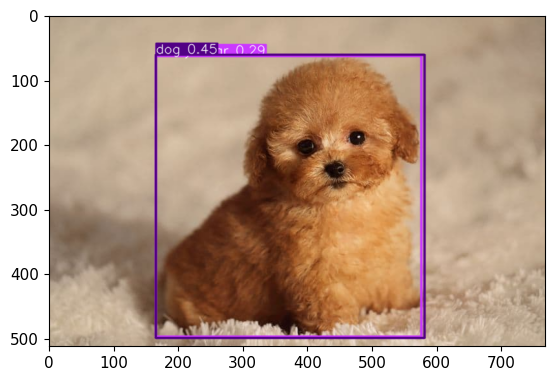

In [8]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [9]:
results.render()

[array([[[184, 166, 142],
         [184, 166, 142],
         [184, 166, 142],
         ...,
         [157, 139, 117],
         [157, 139, 117],
         [157, 139, 117]],
 
        [[184, 166, 142],
         [184, 166, 142],
         [184, 166, 142],
         ...,
         [157, 139, 117],
         [157, 139, 117],
         [157, 139, 117]],
 
        [[184, 166, 142],
         [184, 166, 142],
         [184, 166, 142],
         ...,
         [157, 139, 117],
         [157, 139, 117],
         [157, 139, 117]],
 
        ...,
 
        [[180, 162, 140],
         [179, 161, 139],
         [180, 162, 140],
         ...,
         [189, 169, 145],
         [188, 168, 144],
         [187, 167, 143]],
 
        [[181, 163, 141],
         [178, 160, 138],
         [176, 158, 136],
         ...,
         [190, 170, 146],
         [189, 169, 145],
         [189, 169, 145]],
 
        [[186, 168, 146],
         [181, 163, 141],
         [177, 159, 137],
         ...,
         [193, 173, 149],
  

## Real Time Detections

In [18]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[ WARN:0@3135.573] global cap_v4l.cpp:997 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@3135.573] global obsensor_uvc_stream_channel.cpp:159 getStreamChannelGroup Camera index out of range


In [ ]:
v4